## Práctica de Regresión Lógistica: Cancer de mama
 ----
  
  Universidad : UTEC \\
  Curso       : Inteligencia Artificial \\
  Profesor    : Cristian López Del Alamo \\
  Tema        : Regresión Lógistica \\
  

 ----
Nota Añadir el link de colab en : [Click Colab](https://docs.google.com/spreadsheets/d/1XCxGVmf8g29C7RZSPOqxvZHjjRZg45LHWR8mkZOfS1o/edit?usp=sharing)

 Integrantes:
 - 1. Luis David Torres (100%)
 - 2. Christian Alejandro Salazar Albán (100%)
 - 3. Leonardo Daniel Isidro Salazar (100%)
 - 4. Pedro Mori (100%)



**Base de datos**: [Click](https://docs.google.com/spreadsheets/d/137VWC-uXIeWUIy5F2oVkfPqicFeNFU5oUWVsh5om9a4/edit?usp=sharing)

El conjunto de datos contiene casos de un estudio realizado entre 1958 y 1970 en el Hospital Billings de la Universidad de Chicago sobre la supervivencia de pacientes que se habían sometido a cirugía por cáncer de mama.

La base de datos está formada por 306 objetos, cada objeto tiene 3 características (Edad del paciente al momento de la operación, Años de operación y Número de ganglios axilares positivos detectados) y un predictor (variable a predecir estado de supervivencia, 1 si el paciente vivió, 2 si el paciente murío)

*Se pide predecir, en base a las características de un paciente,  si un paciente sobrevivirá o no*

In [81]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('./db.csv')
for column in dataset.columns:
    if column != 'Clase':
        min_value = dataset[column].min()
        max_value = dataset[column].max()
        dataset[column] = (dataset[column] - min_value) / (max_value - min_value)

dataset.insert(0,'BIAS',1)





**Hipótesis**:

- Ecuación de la recta o Hiperplano
\begin{equation}
h(x_i) = w_0 + w_1x_i^1 +  w_2x_i^2 ... w_kx_i^k
\end{equation} \\

- Ecuación de la función sigmoidea (clasificador binario)
\begin{equation}
s(x_i) = \frac{1}{1 + e^{-h(x_i)}}
\end{equation}






In [82]:
def Hiperplano(x,w):
  # write your code here
  return np.dot(x,w.T)

def S(x,w):
  return 1 / (1 + np.exp(-Hiperplano(x,w)))

- **Loss Function** (Cross-Entropy)

\begin{equation}
L = -\frac{1}{n}\sum_{i=0}^n(y_ilog(s(x_i)) + (1-y_i)log(1-s(x_i)))  
\end{equation} \\


In [83]:
def Loss_function(x,y,w):
  # write your code here
  f1=y*np.log(S(x,w))
  f2=(1-y)*np.log(1-S(x,w))
  f3= np.sum(f1+f2)
  return -1/len(y)*(f3)



- **Derivatives**

\begin{equation}
\frac{\partial L}{\partial w_j} = \frac{1}{n}\sum_{i=0}^n(y_i - s(x_i))(-x_i^j)
\end{equation} \\

Nota:  $x_i^j$ se refiere a la característica $j-esima$ del objeto $i-esimo$ de entrenamiento


In [84]:
def Derivatives(x,y,w):
  # write your code here
  return np.matmul((y - S(x,w)),-x)/len(y)


- Change parameters

\begin{equation}
 w_j = w_i - \alpha\frac{\partial L}{\partial w_j}
\end{equation}

In [85]:
def change_parameters(w, derivatives, alpha):
  # write your code here
  return w - alpha * derivatives

- **Training**

Seleccione $70\%$ de los datos del dataset para entrenamiento y el resto para testing. Recuerde, los datos deben ser seleccionados de manera aleatoría.




In [86]:
def training(x,y, epochs, alpha):
  print(len(x))
  w=np.ones(x.shape[1])
  Loss=[]
  for i in range(epochs):
    L =  Loss_function(x,y,w)
    dw = Derivatives(x,y,w)
    w =  change_parameters(w, dw, alpha)
    Loss.append(L)
  return w,Loss



- **Testing**

Utilize el $30\%$ de los datos restantes para el proceso de testing.

In [87]:
def Testing(x_test, y_test,w):
   y_pred = S(x_test,w)
   y_pred = np.round(y_pred)
   correctos = np.sum(y_pred == y_test)
   print(f"Número de datos correctos:{correctos}")
   porc_aciertos= (correctos/len(y_test))*100
   print(f"Porcentaje de aciertos:{porc_aciertos}%")
   print(f"Porcentaje de error:{100-porc_aciertos}%")


In [88]:
def normalizar(x):
    for i in range(1,len(x)):
        maxi = np.max(x[i])
        mini = np.min(x[i])
        for j in range(len(x[i])):
            x[i][j] = (x[i][j] - mini) / (maxi - mini)
    return x

In [89]:
#Probando

# Calcula el número de filas en el DataFrame
num_filas = len(dataset)

# Calcula el tamaño del subconjunto del 70%
tamanio_subconjunto = int(0.7 * num_filas)

# Genera índices aleatorios para seleccionar filas
indices_aleatorios = np.random.choice(num_filas, tamanio_subconjunto, replace=False)

# Selecciona el 70% de las filas aleatoriamente
entrenamiento = dataset.iloc[indices_aleatorios]


# Obtiene el 30% restante en otro DataFrame
indices_restantes = np.setdiff1d(np.arange(num_filas), indices_aleatorios)
testing = dataset.iloc[indices_restantes]

x_train = entrenamiento.drop('Clase', axis=1).to_numpy()
y_train = entrenamiento['Clase'].to_numpy()

x_test = testing.drop('Clase', axis=1).to_numpy()
y_test = testing['Clase'].to_numpy()

w,loss = training(x_train, y_train, 10000, 0.001)


214


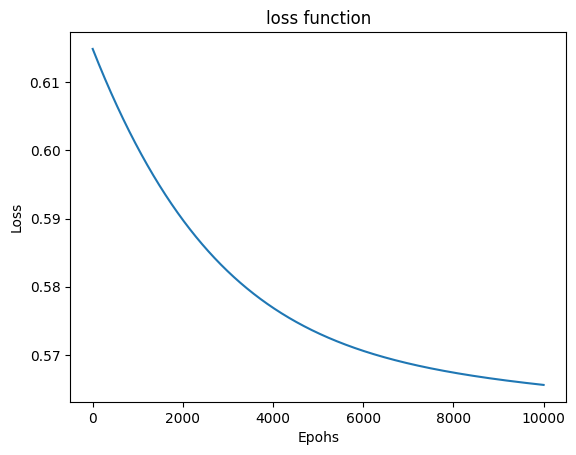

Número de datos correctos:62
Porcentaje de aciertos:67.3913043478261%
Porcentaje de error:32.60869565217391%


In [90]:
import matplotlib.pyplot as plt
def plot_loss(loss):
    plt.figure()
    plt.plot(loss)
    plt.title("loss function")
    plt.xlabel("Epohs")
    plt.ylabel("Loss")
    plt.show()

plot_loss(loss)
Testing(x_test,y_test,w)

## Desarrolle las siguientes actividades

- Implemente funciones para graficar la función de pérdida.
- Implemente la función para mostrar las funciones de error de training vs testing
- ¿Qué porcentaje de aciertos tiene el método?
- ¿Qué porcentaje de fallas tiene el método?




Un exelente libro: [click](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)